# Task 1

In [2]:
import pandas as pd

In [11]:
community = pd.read_csv('communities.csv')
community.head(20)

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,Abbotsford (Suburb),Northern and Western Metropolitan,4,C3,3km ENE of Melbourne,3082.440714,6.114670,4.264157,Yarra (C),Inner North West Primary Care Partnership,...,6.955606,5.179985,1396.274370,St Vincent's Hospital,4.571875,3.191000,323.83038328,23.192461,885.4447909200001,63.414814
1,Aberfeldie (Suburb),Northern and Western Metropolitan,4,B2,8km NW of Melbourne,2426.665450,13.410363,9.881527,Moonee Valley (C),Inner North West Primary Care Partnership,...,10.540675,7.835355,865.262419,Royal Melbourne Hospital,10.681174,7.916626,177.40004939,20.502456,487.0564898400001,56.290032
2,Aireys Inlet - Fairhaven (Catchment),Barwon-South Western,2,D4,108km SW of Melbourne,0.841522,127.057589,134.213743,Surf Coast (S),G21 Health and Wellbeing Pillar,...,79.950423,58.405921,50.832048,Geelong Hospital,79.950423,58.405921,14.44740341,28.421840,27.98233923,55.048616
3,Aireys Inlet - Fairhaven (Town),Barwon-South Western,2,D4,105km SW of Melbourne,213.059443,97.404694,124.859887,Surf Coast (S),G21 Health and Wellbeing Pillar,...,50.297529,49.052066,155.717114,Geelong Hospital,50.297529,49.052066,44.25766899,28.421840,85.72011677,55.048616
4,Airport West (Catchment),Northern and Western Metropolitan,4,B1,11km NNW of Melbourne,210.819042,13.850488,14.758418,Moonee Valley (C),Inner North West Primary Care Partnership,...,9.705913,10.312795,222.247062,Royal Melbourne Hospital,11.121299,12.793518,39.80414965,17.909865,113.66007,51.141315
5,Airport West (Suburb),Northern and Western Metropolitan,4,A1,12km NW of Melbourne,1972.445069,14.529965,15.217034,Moonee Valley (C),Inner North West Primary Care Partnership,...,8.922692,9.448411,1656.648201,Royal Melbourne Hospital,11.800776,13.252133,319.58828131200005,19.291258,935.248289648,56.454248
6,Albanvale (Suburb),Northern and Western Metropolitan,3,D1,19km WNW of Melbourne,2879.831482,24.349505,26.176087,Brimbank (C),"HealthWest (a): Brimbank, Melton Primary Care ...",...,7.140621,5.429464,1234.674789,Royal Melbourne Hospital,21.620316,24.211186,242.79590620000005,19.664766,744.17585311,60.273026
7,Albert Park (Suburb),Southern Metropolitan,1,B1,3km S of Melbourne,1850.280150,6.382196,4.248504,Port Phillip (C),Inner South East Partnership in Community & He...,...,8.132507,6.031332,1332.953868,The Alfred,5.327681,3.323608,188.49851961599998,14.141414,757.32236553,56.815347
8,Albion (Suburb),Northern and Western Metropolitan,3,E2,14km WNW of Melbourne,1765.696283,19.694641,15.596475,Brimbank (C),"HealthWest (a): Brimbank, Melton Primary Care ...",...,5.048947,5.342852,1019.587098,Royal Melbourne Hospital,16.965452,13.631574,200.49941548,19.664766,614.53599405,60.273026
9,Alexandra (Catchment),Hume,3,D4,98km NE of Melbourne,1.795058,133.100558,134.823731,Murrindindi (S),Lower Hume Primary Care Partnership,...,81.113132,81.725614,434.135278,Maroondah Hospital,110.211822,105.783161,125.566250477,28.923300,174.90171181000002,40.287376


In [4]:
popDensity = community["Population Density"]
popDensity.mean()

1068.2551766057582

In [5]:
communityAmount = community.shape[0]
print(communityAmount)

1080


# Task 2
For this task, we will focus only on Suburbs in the dataset rather than Towns or Catchments. Suppose we define a suburb as 'poorly serviced' if the total number of public or private hospitals, community health centres and allied health services is less than 2. Identify the percentage of suburbs that are poorly serviced.

The output of this step should be a json file called task2_summary.json in the following format:

```
{  
    "Percentage of suburbs poorly serviced": X
}
```

In [6]:
health_services = community[["Public Hospitals", "Private Hospitals", "Community Health Centres", "Allied Health"]]
poorly_serviced = health_services.sum(axis=1) < 2
poorly_serviced_amount = poorly_serviced.sum()

poorly_serviced_percent = (poorly_serviced_amount / communityAmount) * 100

# Task 3: Data visualisation using boxplots (2 marks)

Draw a plot consisting of two boxplots. One boxplot to show the distribution of population densities of all Suburbs in the dataset and one boxplot to show the distribution of population densities of all Towns in the dataset.

<Figure size 1200x600 with 0 Axes>

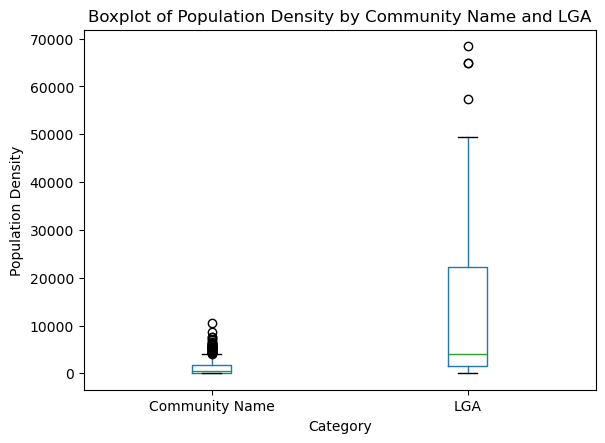

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

community = pd.read_csv('communities.csv')

# Suburb DataFrame: Group by 'Community Name'
suburb_dataframe = community.loc[:, ["Community Name", "Population Density"]].copy()
suburb_dataframe.loc[:, "Category"] = "Community Name"

# Town DataFrame: Group by 'LGA'
town_dataframe = community.loc[:, ["LGA", "Population Density"]].copy()
town_dataframe = town_dataframe.groupby("LGA").sum()
town_dataframe.loc[:, "Category"] = "LGA"

suburb_dataframe["Category"] = "Community Name"
town_dataframe["Category"] = "LGA"

# Rename the columns for consistency
suburb_dataframe.rename(columns={"Community Name": "Name"}, inplace=True)
town_dataframe.rename(columns={"LGA": "Name"}, inplace=True)

# Concatenate the two DataFrames
combined_df = pd.concat([suburb_dataframe, town_dataframe])
# Create the boxplot
plt.figure(figsize=(12, 6))
boxplot = combined_df.boxplot(column="Population Density", by="Category", grid=False)

plt.title('Boxplot of Population Density by Community Name and LGA')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Category')
plt.ylabel('Population Density')
plt.show()



In [36]:
# suburb_boxplot = community.boxplot(by="Population Density")
town_dataframe = community[["LGA", "Population Density"]].groupby("LGA").sum()
town_dataframe.head()
# boxplot = community.boxplot(by="Population Density")

,Population Density
LGA,
Alpine (S),1605.057286
Ararat (RC),723.695183
Ballarat (C),26027.269748
Banyule (C),47600.130981
Bass Coast (S),10073.646149
